<a id='top'></a>
# Faking coin flips 
## [paper here](https://drive.google.com/uc?export=download&id=1P7iLtvTe8-PBBmAqNHCLbUcfZ_vscBs7)
# Content:
#    Theoretical counting
## 1. [Function to count probabilities of event when maximal length (in sequence from $n$ flips) is less then certain $k$](#prob)
 ###  - 1.1 [Its helpful functions](#probs)
 ###  - 1.2 [Result matrix](#matrix)

# Simulations
## 2. [Function to generate sequence of necessary length](#generate)
 ###  - 2.1 [Helpful function to count lengths of runs in sequence](#simulation)
 ###  - 2.2 [Function to count $pmf$](#pmf)
 ###  - 2.3 [Function to count $cdf$](#cdf)
## 3. [Results of $N=100$-times simulation](#100)
 ###  - 3.1 [Calculate its $ecdf$ using built-in functions](#ecdf_100)
 ###  - 3.2 [Its plot](#ecdf_plot)
 ###  - 3.3 [$pmf$ and its plot](#pmf_100)
 ###  - 3.4 [$cdf$ and its plot](#cdf_100)
## 4. [Some more experiments](#additional)
## 5. [Simulation with $n=100$ (length of sequence) and $N=10,000$ (experiment repeats) for more accurate results](#final)
 ###  -5.1 [Its results](#result)
## 6. [Small experiment for small $k$ ($1, 2$)](#small_k)

Import necessary modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from itertools import groupby
from statsmodels.distributions.empirical_distribution import ECDF

Set numbers which will be used<br/>
$n$ = number of flips<br/>
$k$ = number with which maximum length of run will be compared
<br/>[go up ↑](#top)

In [3]:
n = 100
k = 12

<a id='prob'></a><br/>
## Function to count probabilities of event when maximal length (in sequence from  $n$  flips) is less then certain  $k$.<br/>
$P(M_i \le k$) for $1 \le i \le n$
<br/>[go up ↑](#top)

In [4]:
def prob(n, k):
    m = [2]
    m += [1 for _ in range(k)]
    m += [0 for _ in range(n - k)]

    def recurse(i, k):
            if m[i]:
                return m[i]
            else:
                m[i] = recurse(i - 1, k) - recurse(i - k - 1, k)/2**(k + 1)
                return m[i]

    recurse(n, k)
    return m

<a id='probs'></a><br/>
Function to count probabilities of $M_i \le j$ for $1 \le i \le n$ and $1 \le j \le k$ using previous function
<br/>[go up ↑](#top)

In [5]:
def probs(n, k):
    t = [[] for _ in range(n + 1)]
    
    for i in range(1, k + 1):
        m = prob(n, i)
        for p in range(n + 1):
            t[p].append(m[p])

    return t

And generate table from result
<br/>[go up ↑](#top)

In [6]:
def format_matrix(t, n):
    result_matrix = '  n\\k' + ''.join(['%10d' % _ for _ in range(1, k + 1)]) + '\n\n'
    
    for row in t:
        result_matrix += '  ' \
        + '%3d' % t.index(row) \
        + ''.join([('%10d' % p) if type(p) == int else ('%10.5f' % float(p)) for p in row]) + '\n'
    
    return result_matrix
    

<a id='matrix'></a><br/>
### Result matrix
[Skip matrix (click here)](#skip_matrix)
<br/>[go up ↑](#top)

In [7]:
result = probs(n, k)
print(format_matrix(result, n))

  n\k         1         2         3         4         5         6         7         8         9        10        11        12

    0         2         2         2         2         2         2         2         2         2         2         2         2
    1         1         1         1         1         1         1         1         1         1         1         1         1
    2   0.50000         1         1         1         1         1         1         1         1         1         1         1
    3   0.25000   0.75000         1         1         1         1         1         1         1         1         1         1
    4   0.12500   0.62500   0.87500         1         1         1         1         1         1         1         1         1
    5   0.06250   0.50000   0.81250   0.93750         1         1         1         1         1         1         1         1
    6   0.03125   0.40625   0.75000   0.90625   0.96875         1         1         1         1         1         1  

<a id='skip_matrix'></a><a id='generate'></a><br/>
## Function to generate sequence of necessary length
Generate sequence with length $n$ taking values from $\{0, 1\}$ randomly
<br/>[go up ↑](#top)

In [8]:
def generate_sequence(n):
    
    xk = [0, 1]
    pk = (0.5, 0.5)
    x_seq = stats.rv_discrete(values=(xk, pk))

    return x_seq.rvs(size=n)

<a id='simulation'></a><br/>
 ### Helpful function to count lengths of runs in sequence
Count lengths of run and save results as list (of lengths of runs)
<br/>[go up ↑](#top)

In [9]:
def simulation(n):

    flips = generate_sequence(n)
#     print('flips\n', flips)

    return [len(list(group)) for key, group in groupby(flips)]


<a id='pmf'></a><br/>
### Function to count $pmf$
Function to calculate $pmf$ for received list of runs' lengths
<br/>[go up ↑](#top)

In [10]:
def calculate_pmf(runs):
    n = len(runs)
    return sorted({key: runs.count(key)/n for key in runs}.items())

<a id='cdf'></a><br/>
###  Function to count $cdf$
Function to calculate $cdf$ for received list of runs' lengths
<br/>[go up ↑](#top)

In [11]:
def calculate_cdf(pmf):
    cdf = []
    for p in range(len(pmf)):
        cdf.append([pmf[p][0], pmf[p][1]])
        for i in range(p):
            cdf[p][1] += pmf[i][1]
    return cdf

<a id='100'></a><br/>
## Run simulation
$N$ = number of simulations
<br/>[go up ↑](#top)

In [12]:
N = 100

In [13]:
maximal_lengths = [max(simulation(n)) for _ in range(N)]
print('maximal lengths\n', maximal_lengths[:20], '...')

maximal lengths
 [8, 6, 9, 11, 5, 8, 6, 6, 5, 6, 6, 9, 9, 5, 8, 9, 8, 6, 6, 6] ...


<a id='ecdf_100'></a><br/>
### Calculate its $ecdf$ using built-in functions
Calculate $ecdf$
<br/>[go up ↑](#top)

In [14]:
ecdf = ECDF(maximal_lengths)
ecdf_dict = {int(key): round(value, 6) for key, value in zip(ecdf.x[1:], ecdf.y[1:])}
ecdf_for_print = '\n'.join('%d: %.6f' % (key, ecdf_dict[key]) for key in ecdf_dict)
print(ecdf_for_print)

4: 0.030000
5: 0.240000
6: 0.480000
7: 0.660000
8: 0.810000
9: 0.940000
10: 0.970000
11: 0.990000
14: 1.000000


<a id='ecdf_plot'></a><br/>
### Its plot
and build plot of it
<br/>[go up ↑](#top)

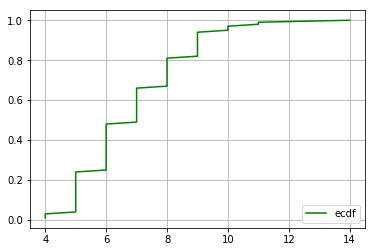

In [15]:
plt.plot(ecdf.x, ecdf.y, '-g', label='ecdf')
plt.legend(loc='lower right')
plt.grid()

<a id='pmf_100'></a><br/>
### $pmf$ and its plot
Then $pmf$ ...
<br/>[go up ↑](#top)

In [16]:
pmf = calculate_pmf(maximal_lengths)
print('\n'.join(['%d: %.6f' % (p[0], p[1]) for p in pmf]))

4: 0.030000
5: 0.210000
6: 0.240000
7: 0.180000
8: 0.150000
9: 0.130000
10: 0.030000
11: 0.020000
14: 0.010000


with plot
<br/>[go up ↑](#top)

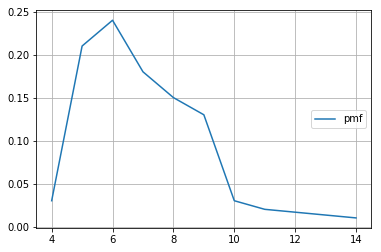

In [17]:
plt.plot([d[0] for d in pmf], [d[1] for d in pmf], label='pmf')
plt.legend(loc='right')
plt.grid()

<a id='cdf_100'></a><br/>
### $cdf$ and its plot
and $cdf$ ...
<br/>[go up ↑](#top)

In [18]:
cdf = calculate_cdf(pmf)
print('\n'.join(['%d: %.6f' % (c[0], c[1]) for c in cdf]))

4: 0.030000
5: 0.240000
6: 0.480000
7: 0.660000
8: 0.810000
9: 0.940000
10: 0.970000
11: 0.990000
14: 1.000000


with plot too
<br/>[go up ↑](#top)

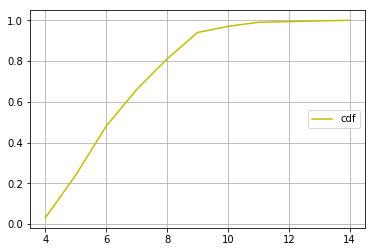

In [19]:
plt.plot([d[0] for d in cdf], [d[1] for d in cdf], '-y', label='cdf')
plt.legend(loc='right')
plt.grid()

<a id='additional'></a><br/>
Now, you can just go to the __*[final (click here)](#final)*__ experiment and conclusions,<br/>
but if you want you can observe some in-between experiments (for different $n$ and $N$)<br/>
So, let's repeat simulation 1000 times:
<br/>[go up ↑](#top)

In [20]:
N = 1000

maximal lengths
 [9, 7, 6, 7, 6, 4, 6, 6, 9, 8, 6, 6, 8, 7, 6, 11, 6, 7, 9, 5] ...


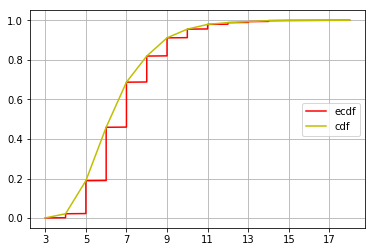

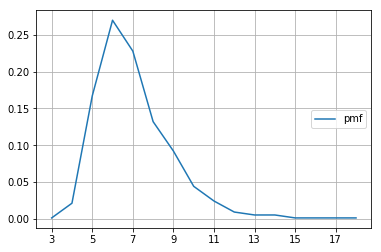

In [21]:
maximal_lengths = [max(simulation(n)) for _ in range(N)]
print('maximal lengths\n', maximal_lengths[:20], '...')

ecdf = ECDF(maximal_lengths)
# ecdf_dict = {int(key): round(value, 6) for key, value in zip(ecdf.x[1:], ecdf.y[1:])}
# ecdf_for_print = '\n'.join('%d: %.6f' % (key, ecdf_dict[key]) for key in ecdf_dict)
# print(ecdf_for_print)

plt.figure(0)
plt.plot(ecdf.x, ecdf.y, '-r', label='ecdf')

pmf = calculate_pmf(maximal_lengths)
# print("pmf:")
# print('\n'.join(['%d: %.6f' % (p[0], p[1]) for p in pmf]))

cdf = calculate_cdf(pmf)
# print("cdf:")
# print('\n'.join(['%d: %.6f' % (c[0], c[1]) for c in cdf]))

plt.plot([d[0] for d in cdf], [d[1] for d in cdf], '-y', label='cdf')
plt.legend(loc='center right')
p = plt.xticks(range(min(maximal_lengths), max(maximal_lengths), 2))
plt.grid()

plt.figure(1)
plt.plot([d[0] for d in pmf], [d[1] for d in pmf], label='pmf')
plt.legend(loc='center right')
p = plt.xticks(range(min(maximal_lengths), max(maximal_lengths), 2))
plt.grid()

And $1,000$ times for length of sequence equals to $200$:
<br/>[go up ↑](#top)

maximal lengths
 [10, 9, 7, 7, 7, 6, 12, 6, 8, 8, 7, 7, 8, 8, 12, 9, 8, 11, 8, 9] ...


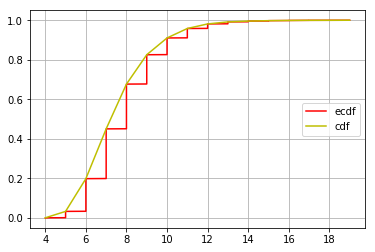

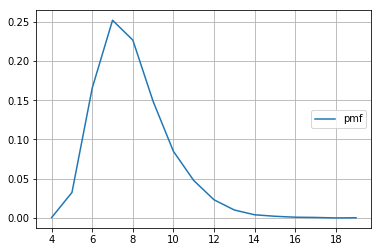

In [22]:
n = 200
N = 10_000
maximal_lengths = [max(simulation(n)) for _ in range(N)]
print('maximal lengths\n', maximal_lengths[:20], '...')

ecdf = ECDF(maximal_lengths)
# ecdf_dict = {int(key): round(value, 6) for key, value in zip(ecdf.x[1:], ecdf.y[1:])}
# ecdf_for_print = '\n'.join('%d: %.6f' % (key, ecdf_dict[key]) for key in ecdf_dict)
# print(ecdf_for_print)

plt.figure(0)
plt.plot(ecdf.x, ecdf.y, '-r', label='ecdf')
p = plt.xticks(range(min(maximal_lengths), max(maximal_lengths), 2))

pmf = calculate_pmf(maximal_lengths)
# print("pmf:")
# print('\n'.join(['%d: %.6f' % (p[0], p[1]) for p in pmf]))

cdf = calculate_cdf(pmf)
# print("cdf:")
# print('\n'.join(['%d: %.6f' % (c[0], c[1]) for c in cdf]))

plt.plot([d[0] for d in cdf], [d[1] for d in cdf], '-y', label='cdf')
plt.legend(loc='right')
plt.grid()

plt.figure(1)
plt.plot([d[0] for d in pmf], [d[1] for d in pmf], label='pmf')
plt.legend(loc='center right')
p = plt.xticks(range(min(maximal_lengths), max(maximal_lengths), 2))
plt.grid()

<a id='final'></a><br/>
## Final experiments 
### For big $n$
And __*finally*__, let's observe results of $10,000$ generations of sequence of length $100$
<br/>[go up ↑](#top)

maximal lengths
 [5, 8, 8, 6, 10, 7, 7, 8, 7, 5, 7, 10, 7, 9, 5, 5, 9, 7, 8, 8] ...
ecdf:
3: 0.000300
4: 0.027000
5: 0.197900
6: 0.456300
7: 0.682700
8: 0.832800
9: 0.914100
10: 0.956900
11: 0.978900
12: 0.988900
13: 0.994500
14: 0.997200
15: 0.998100
16: 0.998800
17: 0.999300
18: 0.999600
19: 1.000000
pmf:
3: 0.000300
4: 0.026700
5: 0.170900
6: 0.258400
7: 0.226400
8: 0.150100
9: 0.081300
10: 0.042800
11: 0.022000
12: 0.010000
13: 0.005600
14: 0.002700
15: 0.000900
16: 0.000700
17: 0.000500
18: 0.000300
19: 0.000400
cdf:
3: 0.000300
4: 0.027000
5: 0.197900
6: 0.456300
7: 0.682700
8: 0.832800
9: 0.914100
10: 0.956900
11: 0.978900
12: 0.988900
13: 0.994500
14: 0.997200
15: 0.998100
16: 0.998800
17: 0.999300
18: 0.999600
19: 1.000000


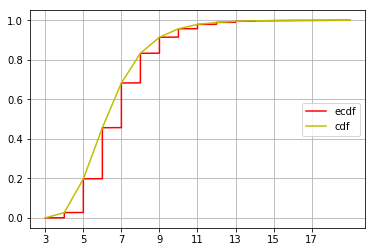

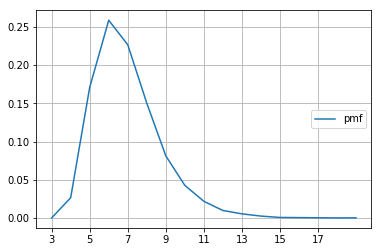

In [23]:
n = 100
N = 10_000
maximal_lengths = [max(simulation(n)) for _ in range(N)]
print('maximal lengths\n', maximal_lengths[:20], '...')

ecdf = ECDF(maximal_lengths)
ecdf_dict = {int(key): round(value, 6) for key, value in zip(ecdf.x[1:], ecdf.y[1:])}
ecdf_for_print = '\n'.join('%d: %f' % (key, ecdf_dict[key]) for key in ecdf_dict)
print("ecdf:")
print(ecdf_for_print)

#ecdf plot
plt.figure(0)
plt.plot(ecdf.x, ecdf.y, '-r', label='ecdf')

pmf = calculate_pmf(maximal_lengths)
print("pmf:")
print('\n'.join(['%d: %.6f' % (p[0], p[1]) for p in pmf]))

cdf = calculate_cdf(pmf)
print("cdf:")
print('\n'.join(['%d: %f' % (c[0], c[1]) for c in cdf]))

#cdf plot
plt.plot([d[0] for d in cdf], [d[1] for d in cdf], '-y', label='cdf')
plt.legend(loc='center right')
p = plt.xticks(range(min(maximal_lengths), max(maximal_lengths), 2))
plt.grid()

# pmf plot
plt.figure(1)
plt.plot([d[0] for d in pmf], [d[1] for d in pmf], label='pmf')
p = plt.xticks(range(min(maximal_lengths), max(maximal_lengths), 2))
plt.legend(loc='center right')
plt.grid()

<a id='result'></a><br/>
## Results
We can see, that the most frequent values for sequence of $100$ flips are $5, 6, 7$, and here are their probabilities<br/>
>5: 0.166300<br/>
>6: 0.264000<br/>
>7: 0.226800<br/>

Let's compare theoretically counted values of $M_{100} \le k,  k = \{5, 6, 7\}$ with real ones.<br/>
From [matrix above](#matrix) we have next values:
>5: 0.19318<br/>
>6: 0.45766<br/>
>7: 0.68523<br/>

And in $100$-times simulation we have got:
>5: 0.220000<br/>
>6: 0.490000<br/>
>7: 0.720000<br/>

For $N=10,000$ results are:
>5: 0.195400<br/>
>6: 0.459400<br/>
>7: 0.686200<br/>

We can see that values recived in experiments are very close to theoretical ones even for $100$ runs of experiment, and when we had simulated sequence for $10,000$ times, results became better, what was predictable.
<br/>[go up ↑](#top)

<a id='small_k'></a><br/>
## For small $n$
For diversity, let's observe case for small $k$ (maximal length of run) such as $1 and 2$. Let's rebuild part of [table above](#matrix) with theoretecally counted values of $M_n \le k$  for $1 \le n \le 20, 1 \le k \le 2$

In [24]:
n = 20
result = probs(n, 2)
print(format_matrix(result, n))

  n\k         1         2         3         4         5         6         7         8         9        10        11        12

    0         2         2
    1         1         1
    2   0.50000         1
    3   0.25000   0.75000
    4   0.12500   0.62500
    5   0.06250   0.50000
    6   0.03125   0.40625
    7   0.01562   0.32812
    8   0.00781   0.26562
    9   0.00391   0.21484
   10   0.00195   0.17383
   11   0.00098   0.14062
   12   0.00049   0.11377
   13   0.00024   0.09204
   14   0.00012   0.07446
   15   0.00006   0.06024
   16   0.00003   0.04874
   17   0.00002   0.03943
   18   0.00001   0.03190
   19   0.00000   0.02581
   20   0.00000   0.02088



In [25]:
N = 1000

### Results
And compare that values with simulated ones. So, theoretically, we'll have<br/>

|     |    $\le1$  |    $\le2$<br/> |
| --- | ---------- | -------------- |
| 10  |  0.00195   |  0.17383<br/>  |
| 20  |  0.00000   |  0.02088<br/>  |

Via simulations ($1000$ times) we have got (see code below):

|     |    $\le1$  |    $\le2$  |
| --- | ---------  | ---------  |
| 10  |  0.002100  |  0.170300  |
| 20  |  0.000000  |  0.019500  |


Again, our formula caclculating is confirmed by real simulations. Interesting thing is observed, although - starting from quite small number of flips in one sequence ($19$), we have probability to get run of length $1$ converges to $0$ in both cases.
<br/>[go up ↑](#top)

In [26]:
n = 10
maximal_lengths = [max(simulation(n)) for _ in range(N)]
pmf = calculate_pmf(maximal_lengths)
cdf = calculate_cdf(pmf)
print('\n'.join(['%d: %f' % (c[0], c[1]) for c in cdf]))

1: 0.001000
2: 0.168000
3: 0.536000
4: 0.792000
5: 0.909000
6: 0.957000
7: 0.982000
8: 0.992000
9: 0.997000
10: 1.000000


In [27]:
n = 20
maximal_lengths = [max(simulation(n)) for _ in range(N)]
pmf = calculate_pmf(maximal_lengths)
cdf = calculate_cdf(pmf)
print('\n'.join(['%d: %f' % (c[0], c[1]) for c in cdf]))

2: 0.020000
3: 0.232000
4: 0.547000
5: 0.770000
6: 0.876000
7: 0.941000
8: 0.967000
9: 0.982000
10: 0.991000
11: 0.996000
12: 0.998000
13: 0.999000
15: 1.000000


And, as we started from sequence of $50$ flips, let's observe case with it ($10,000$ simulations)

In [29]:
n = 50
maximal_lengths = [max(simulation(n)) for _ in range(N)]
pmf = calculate_pmf(maximal_lengths)
print('pmf:')
print('\n'.join(['%d: %.6f' % (p[0], p[1]) for p in pmf]))
cdf = calculate_cdf(pmf)
print('cdf:')
print('\n'.join(['%d: %f' % (c[0], c[1]) for c in cdf]))

pmf:
3: 0.017000
4: 0.147000
5: 0.293000
6: 0.234000
7: 0.145000
8: 0.083000
9: 0.041000
10: 0.020000
11: 0.015000
12: 0.003000
14: 0.002000
cdf:
3: 0.017000
4: 0.164000
5: 0.457000
6: 0.691000
7: 0.836000
8: 0.919000
9: 0.960000
10: 0.980000
11: 0.995000
12: 0.998000
14: 1.000000
